# Data Cleaning and Processing

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 

Opening the csv data and dropping null values that will be able to be read in the ML process

In [3]:
df =pd.read_csv("usa_mercedes_benz_prices.csv")
pd.set_option('display.max_rows', 100)
df.dropna(inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 2135 entries, 0 to 2428
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2135 non-null   object 
 1   Mileage       2135 non-null   object 
 2   Rating        2135 non-null   float64
 3   Review Count  2135 non-null   object 
 4   Price         2135 non-null   object 
dtypes: float64(1), object(4)
memory usage: 100.1+ KB


,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"
...,...,...,...,...,...
2423,2020 Mercedes-Benz AMG GT 53 Base,"36,814 mi.",4.7,"1,424","$75,577"
2425,2022 Mercedes-Benz S-Class 4MATIC,"11,395 mi.",4.5,"1,334","$89,599"
2426,2021 Mercedes-Benz GLB 250 Base 4MATIC,"30,392 mi.",4.9,"2,375","$32,890"
2427,2023 Mercedes-Benz E-Class E 450 4MATIC,"3,413 mi.",4.8,"1,758","$53,983"


Seperate the car name into details such as make, model, year and other details

In [7]:
df['Name'] = df['Name'].apply(lambda x: x.lower())
df['Year'] = df['Name'].str.split().str.get(0)


In [8]:
# Remove 'mi.' from mileage column
df['Mileage'] = df['Mileage'].str.replace(' mi.', '')
# Remove '$' from Price column
df['Price'] = df['Price'].str.replace('$', '')
# Remove , from numbers
df['Mileage'] = df['Mileage'].str.replace(',', '')
df['Review Count'] = df['Review Count'].str.replace(',', '')
df['Price'] = df['Price'].str.replace(',', '')
df

,Name,Mileage,Rating,Review Count,Price,Year
0,2021 mercedes-benz a-class a 220 4matic,29636,3.9,1800,30900,2021
1,2022 mercedes-benz amg sl 63 base,5540,4.7,1239,139999,2022
2,2022 mercedes-benz amg sl 63 base,4890,4.7,1239,132999,2022
3,2020 mercedes-benz amg e 53 base 4matic,29746,4.8,752,58587,2020
4,2021 mercedes-benz amg gls 63 base 4matic,32631,5.0,1502,95990,2021
...,...,...,...,...,...,...
2423,2020 mercedes-benz amg gt 53 base,36814,4.7,1424,75577,2020
2425,2022 mercedes-benz s-class 4matic,11395,4.5,1334,89599,2022
2426,2021 mercedes-benz glb 250 base 4matic,30392,4.9,2375,32890,2021
2427,2023 mercedes-benz e-class e 450 4matic,3413,4.8,1758,53983,2023


In [10]:
df['AMG'] = df['Name'].apply(lambda x: 1 if 'amg' in x else 0)
df['4MATIC'] = df['Name'].apply(lambda x: 1 if '4matic' in x else 0)

In [11]:
test = df['Name'].str.replace("amg","").str.split().str[2]
test = pd.DataFrame(test)
test
df['Model'] = test
df
##df

,Name,Mileage,Rating,Review Count,Price,Year,AMG,4MATIC,Model
0,2021 mercedes-benz a-class a 220 4matic,29636,3.9,1800,30900,2021,0,1,a-class
1,2022 mercedes-benz amg sl 63 base,5540,4.7,1239,139999,2022,1,0,sl
2,2022 mercedes-benz amg sl 63 base,4890,4.7,1239,132999,2022,1,0,sl
3,2020 mercedes-benz amg e 53 base 4matic,29746,4.8,752,58587,2020,1,1,e
4,2021 mercedes-benz amg gls 63 base 4matic,32631,5.0,1502,95990,2021,1,1,gls
...,...,...,...,...,...,...,...,...,...
2423,2020 mercedes-benz amg gt 53 base,36814,4.7,1424,75577,2020,1,0,gt
2425,2022 mercedes-benz s-class 4matic,11395,4.5,1334,89599,2022,0,1,s-class
2426,2021 mercedes-benz glb 250 base 4matic,30392,4.9,2375,32890,2021,0,1,glb
2427,2023 mercedes-benz e-class e 450 4matic,3413,4.8,1758,53983,2023,0,1,e-class


Remove Name Column as its been subdivided into seperate columns

In [12]:
df =df.drop(['Name'],axis=1)

In [13]:
df

,Mileage,Rating,Review Count,Price,Year,AMG,4MATIC,Model
0,29636,3.9,1800,30900,2021,0,1,a-class
1,5540,4.7,1239,139999,2022,1,0,sl
2,4890,4.7,1239,132999,2022,1,0,sl
3,29746,4.8,752,58587,2020,1,1,e
4,32631,5.0,1502,95990,2021,1,1,gls
...,...,...,...,...,...,...,...,...
2423,36814,4.7,1424,75577,2020,1,0,gt
2425,11395,4.5,1334,89599,2022,0,1,s-class
2426,30392,4.9,2375,32890,2021,0,1,glb
2427,3413,4.8,1758,53983,2023,0,1,e-class


Verifying all values in price that isnt numerical and dropping them

In [14]:
uniquePrice = df['Price'].unique()
UniPriceList = uniquePrice.tolist()
print(UniPriceList)
df['Price'] = df['Price'].replace('Not Priced', np.nan)
df.dropna(inplace=True)

['30900', '139999', '132999', '58587', '95990', '74999', '130999', '55995', '71999', '62975', '82895', '50226', '22495', '63998', '65024', '69771', '51995', '57877', '53977', '22498', '67800', '42595', '74788', '58770', '53690', '46900', '38996', '69306', '39442', '112749', '57900', '49995', '153722', '43855', '74887', '59413', '68983', '46300', '62421', '198000', '36900', '62292', '50299', '98984', '77700', '143554', '54000', '57463', '84997', '74377', '49913', '21082', '161775', '79711', '48500', '50900', '54018', '38963', '107552', '50595', '47562', '95981', '98555', '57445', '94995', '43105', '55998', '33497', '177595', '69998', '120997', '48000', '73998', '69997', '157500', '45705', '114750', '41948', '99805', '67910', '60312', '58997', '35824', '86690', '60994', '53922', '67585', '56940', '62704', '209995', '55000', '41690', '44744', '65999', '49983', '87390', '111326', '68500', '33999', '31293', '99999', '78900', '36880', '42499', '20999', '74988', '26540', '94984', '86975', '77

Formatting Data

In [15]:
df['Year'] = df['Year'].astype(float)
df['Mileage'] = df['Mileage'].astype(float)
df['Price'] = df['Price'].astype(float)
df['Rating'] = df['Rating'].astype(float)
df['Review Count'] = df['Review Count'].astype(float)


In [16]:
print(df.dtypes)

Mileage         float64
Rating          float64
Review Count    float64
Price           float64
Year            float64
AMG               int64
4MATIC            int64
Model            object
dtype: object


Log Transform large datasets for data analysis

In [17]:
df['LogPrice'] = np.log(df['Price'])
df['LogMile'] = np.log(df['Mileage'])

# Data Analysis and observations

Histograms for all data and counts

array([[<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Review Count'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'AMG'}>],
       [<Axes: title={'center': '4MATIC'}>,
        <Axes: title={'center': 'LogPrice'}>,
        <Axes: title={'center': 'LogMile'}>]], dtype=object)

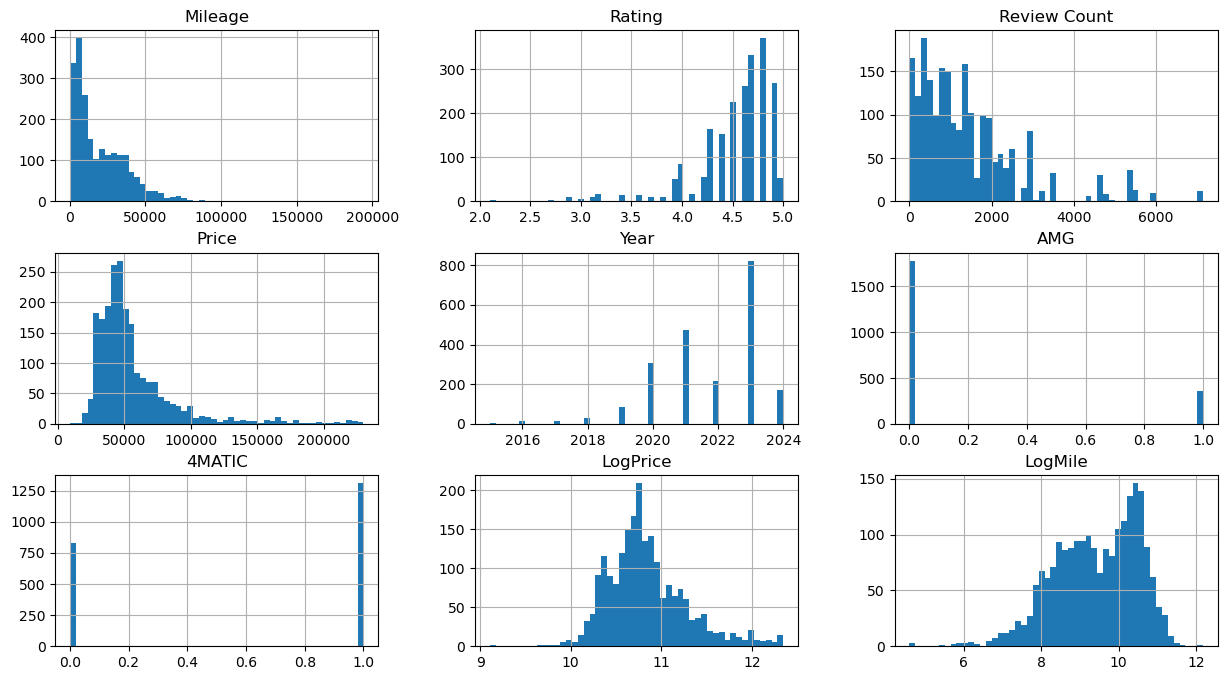

In [20]:
df.hist(figsize=(15, 8),bins = 50)

Boxplot to see spread of data

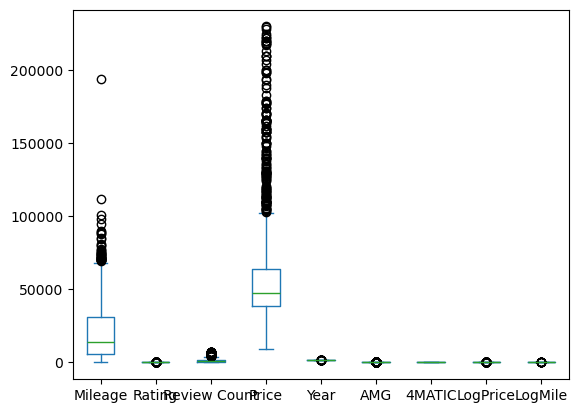

In [22]:
df.plot(kind = 'box')
plt.show()

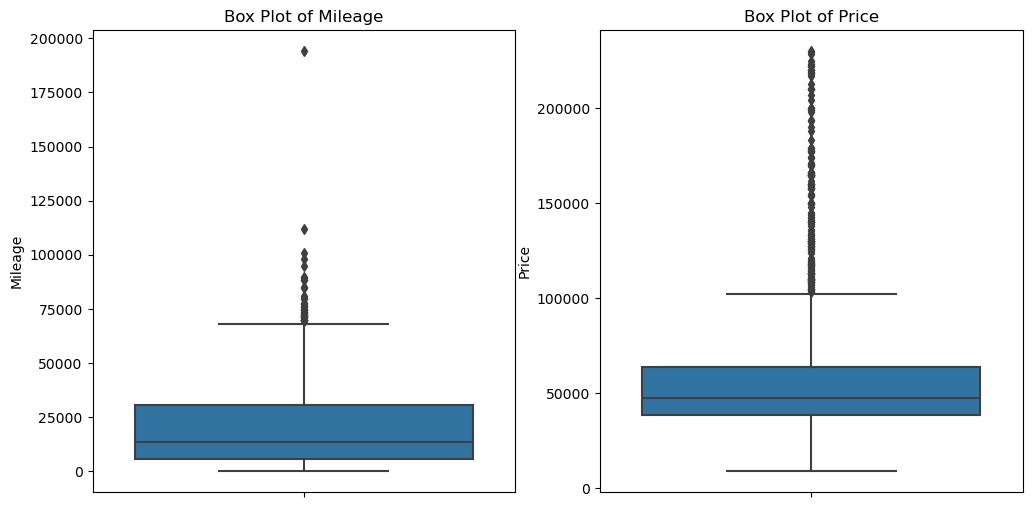

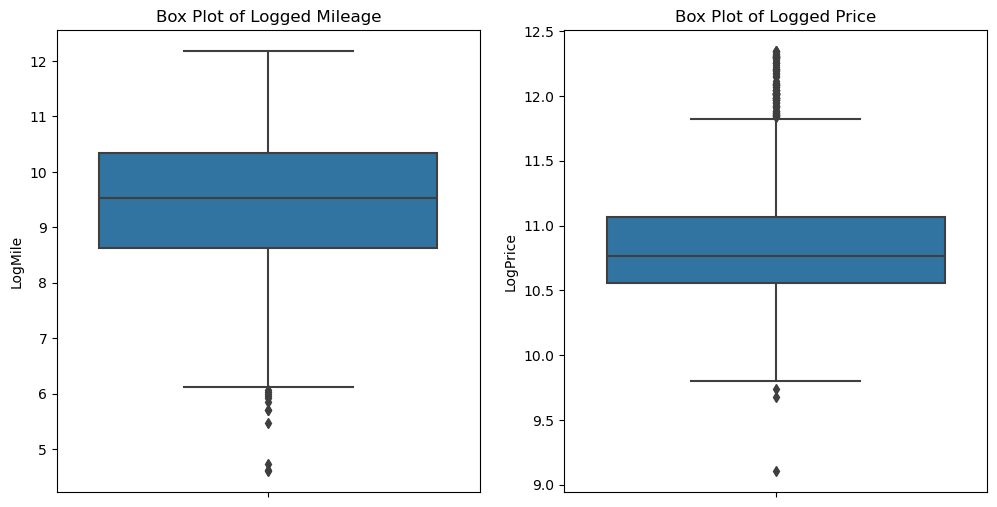

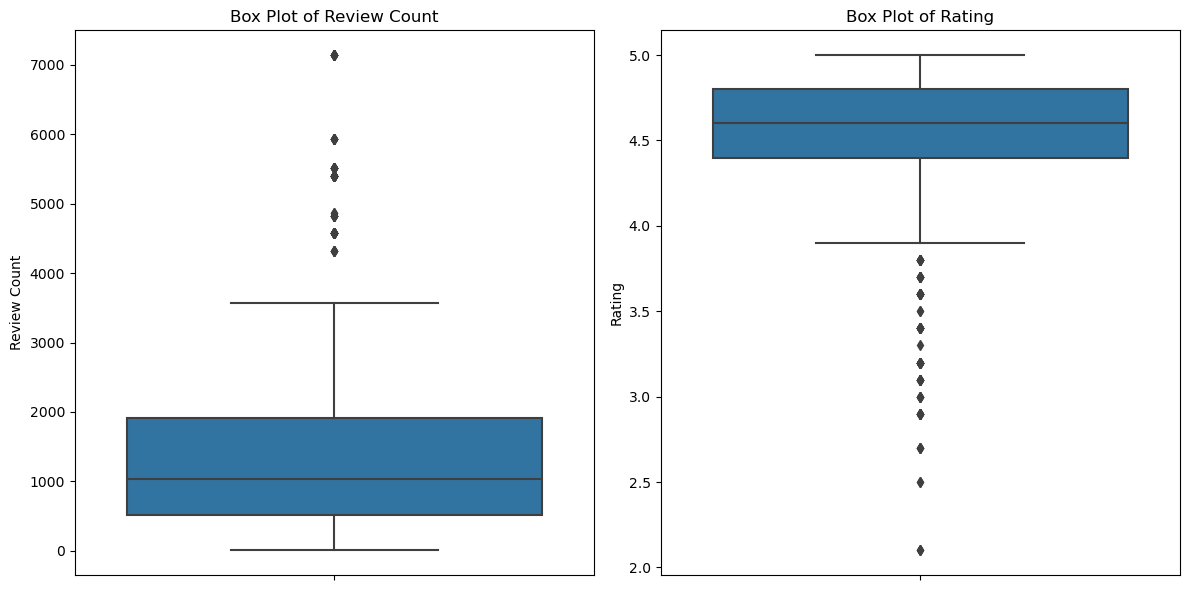

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Mileage', data=df)
plt.title('Box Plot of Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='Price', data=df)
plt.title('Box Plot of Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='LogMile', data=df)
plt.title('Box Plot of Logged Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='LogPrice', data=df)
plt.title('Box Plot of Logged Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Review Count', data=df)
plt.title('Box Plot of Review Count')

plt.subplot(1, 2, 2)
sns.boxplot(y='Rating', data=df)
plt.title('Box Plot of Rating')

plt.tight_layout()
plt.show()

Scatterplot to analyze relationships between Data

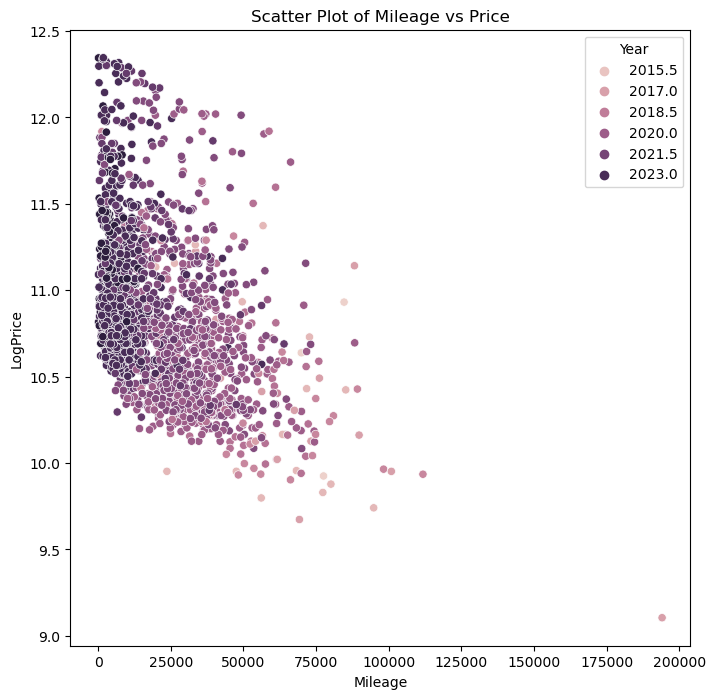

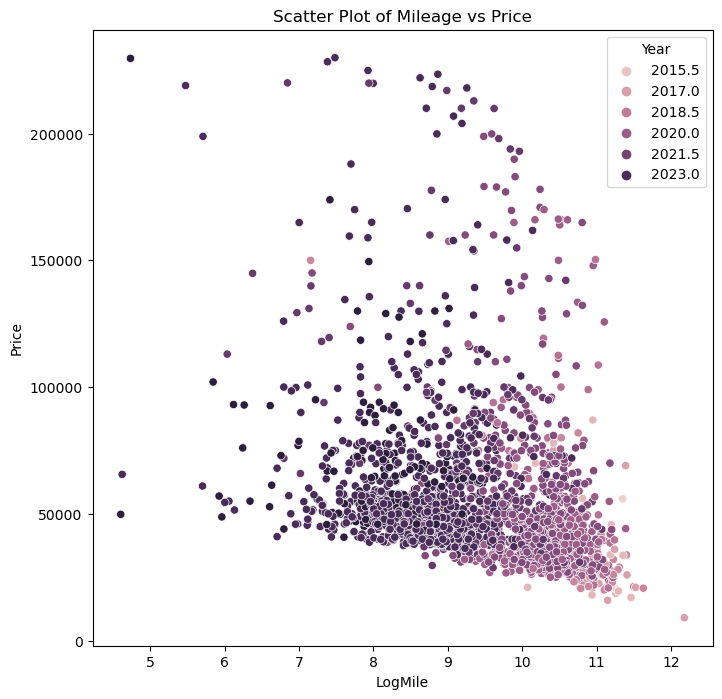

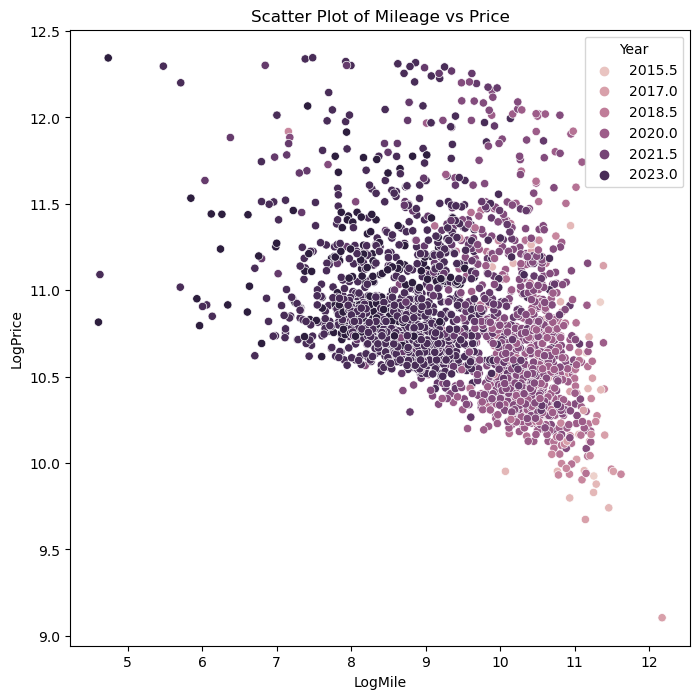

In [25]:
# Scatter Plot

plt.figure(figsize=(8, 8))
sns.scatterplot(x='Mileage', y= 'LogPrice', data=df, hue='Year')
plt.title('Scatter Plot of Mileage vs Price')

plt.figure(figsize=(8, 8))
sns.scatterplot(x='LogMile', y= 'Price', data=df, hue='Year')
plt.title('Scatter Plot of Mileage vs Price')

plt.figure(figsize=(8, 8))
sns.scatterplot(x='LogMile', y= 'LogPrice', data=df, hue='Year')
plt.title('Scatter Plot of Mileage vs Price')

plt.show()

We notice a clear negative correlation with mileage and price after logging both values

In [26]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2134 entries, 0 to 2428
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mileage       2134 non-null   float64
 1   Rating        2134 non-null   float64
 2   Review Count  2134 non-null   float64
 3   Price         2134 non-null   float64
 4   Year          2134 non-null   float64
 5   AMG           2134 non-null   int64  
 6   4MATIC        2134 non-null   int64  
 7   Model         2134 non-null   object 
 8   LogPrice      2134 non-null   float64
 9   LogMile       2134 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 183.4+ KB


Correlation Map

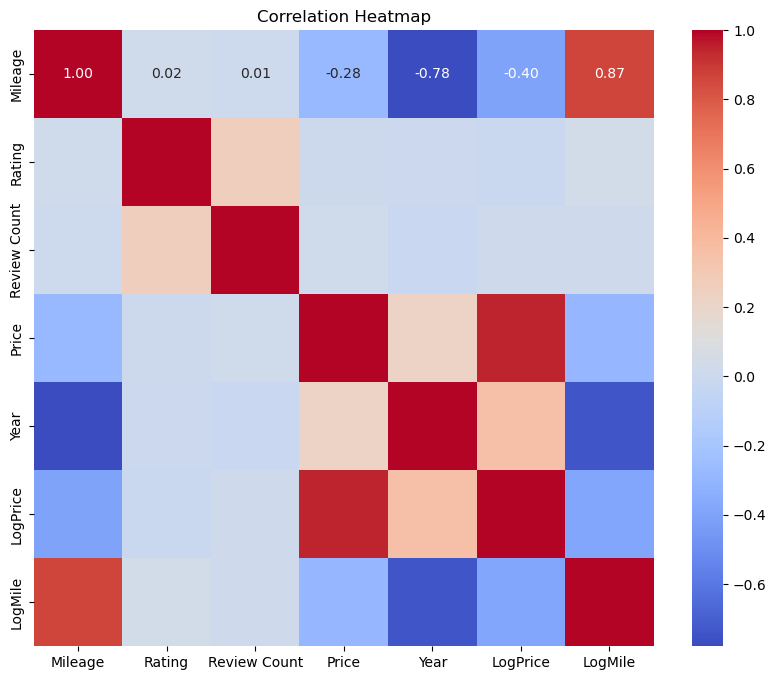

In [28]:
plt.figure(figsize=(10, 8))
num_cols = df.select_dtypes('float64')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

Clean out the Outliers

In [29]:
def remove_outliers(df):
    df_cleaned = df.copy()

    for col in df_cleaned.select_dtypes(include='number').columns:
        q1 = df_cleaned[col].quantile(0.25)
        q3 = df_cleaned[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)
        df_cleaned = df_cleaned[~outliers]
    
    return df_cleaned

In [30]:
df = remove_outliers(df)

Reevaluating cleaned data outliers

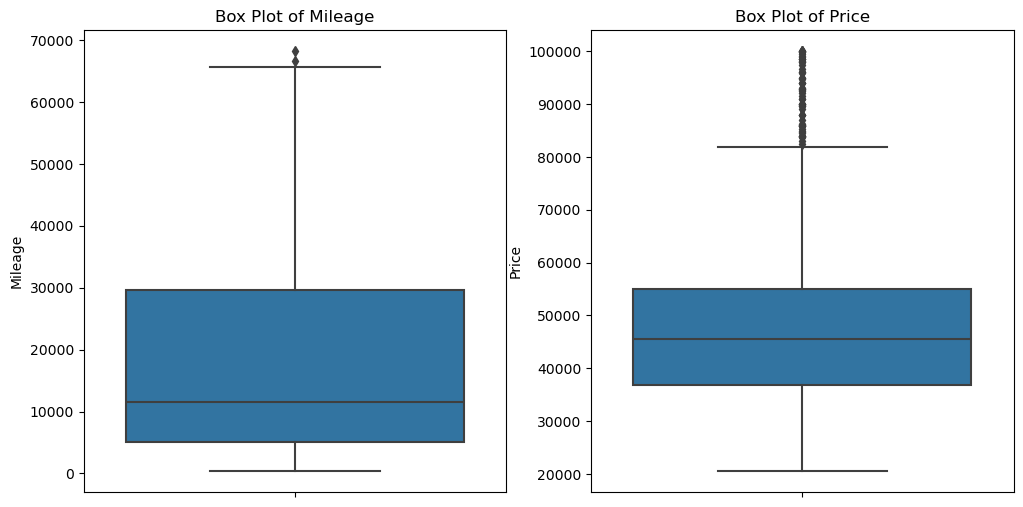

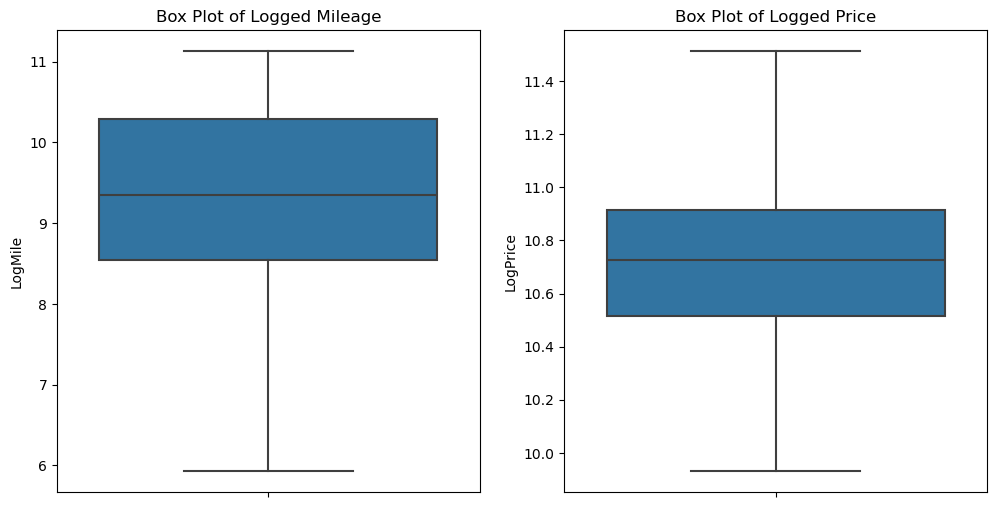

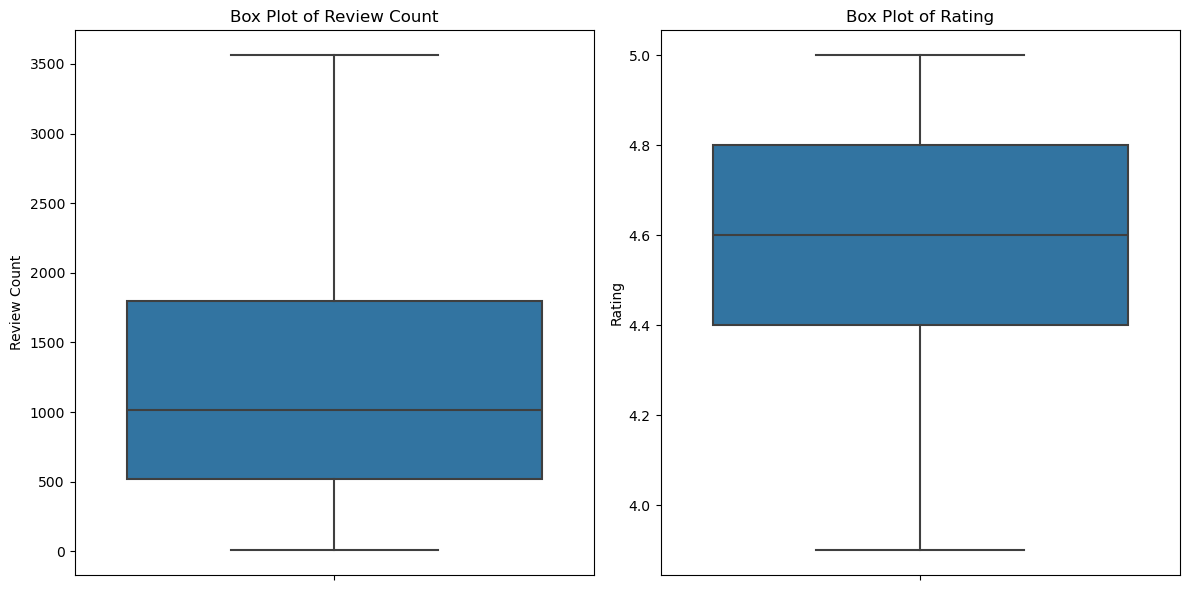

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Mileage', data=df)
plt.title('Box Plot of Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='Price', data=df)
plt.title('Box Plot of Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='LogMile', data=df)
plt.title('Box Plot of Logged Mileage')

plt.subplot(1, 2, 2)
sns.boxplot(y='LogPrice', data=df)
plt.title('Box Plot of Logged Price')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Review Count', data=df)
plt.title('Box Plot of Review Count')

plt.subplot(1, 2, 2)
sns.boxplot(y='Rating', data=df)
plt.title('Box Plot of Rating')

plt.tight_layout()
plt.show()

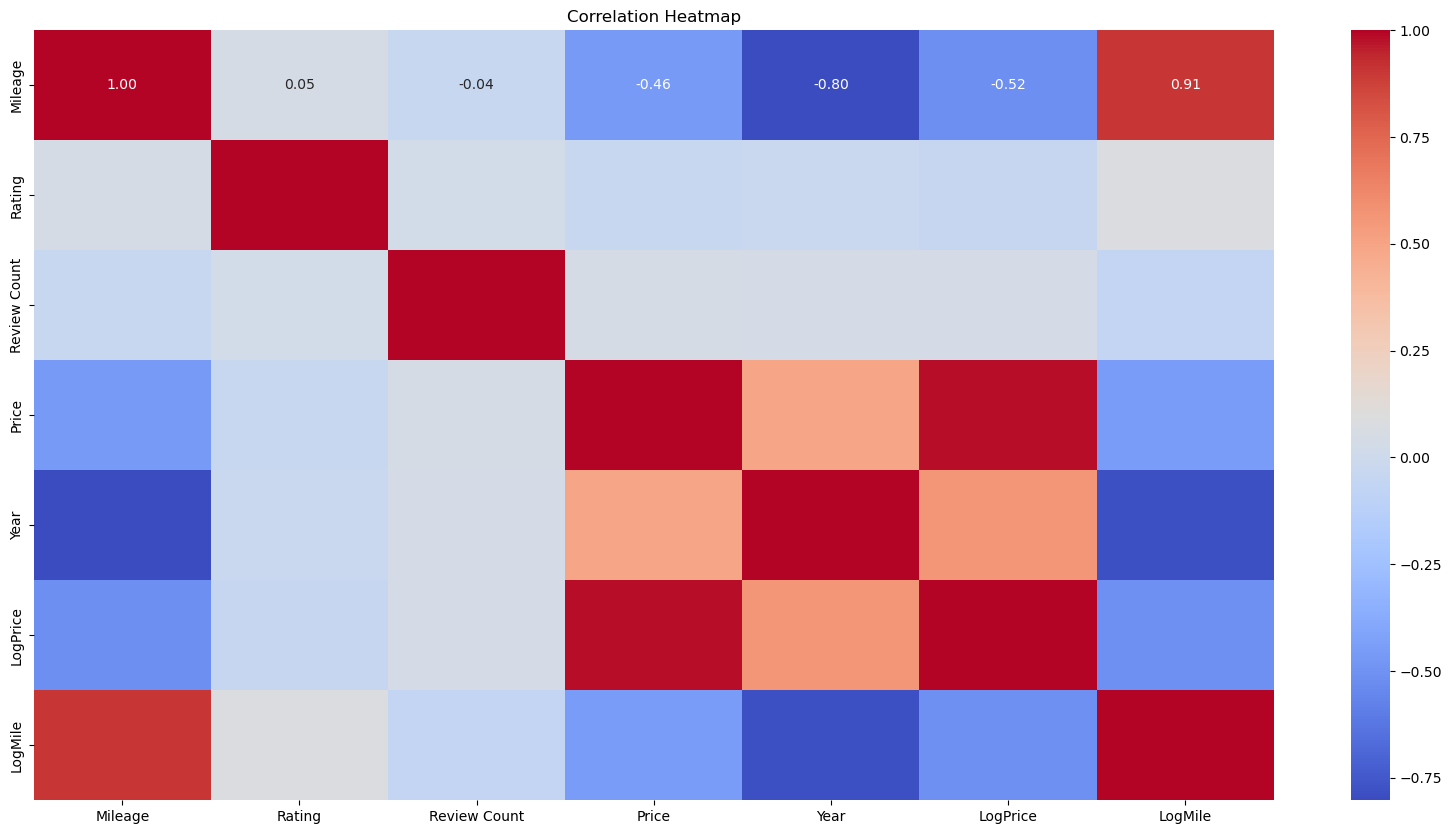

In [35]:
plt.figure(figsize=(20, 10))
num_cols = df.select_dtypes('float64')
heatmap = sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

Labeling Car models for Random Forest process

In [37]:
from sklearn.preprocessing import LabelEncoder
 

Lbl=LabelEncoder()
df.Model=Lbl.fit_transform(df.Model)
df.dropna(inplace=True)
print(df)

      Mileage  Rating  Review Count    Price    Year  AMG  4MATIC  Model  \
0     29636.0     3.9        1800.0  30900.0  2021.0    0       1      0   
11     3159.0     4.6         585.0  50226.0  2023.0    0       0      5   
12    61419.0     4.0         377.0  22495.0  2019.0    0       1      2   
13    15009.0     4.8         899.0  63998.0  2023.0    0       0     12   
14    14021.0     4.3         352.0  65024.0  2020.0    0       0     17   
...       ...     ...           ...      ...     ...  ...     ...    ...   
2422  18709.0     4.4        1038.0  65886.0  2022.0    0       1     12   
2425  11395.0     4.5        1334.0  89599.0  2022.0    0       1     16   
2426  30392.0     4.9        2375.0  32890.0  2021.0    0       1     10   
2427   3413.0     4.8        1758.0  53983.0  2023.0    0       1      4   
2428   6336.0     4.5        2057.0  46035.0  2023.0    0       0      9   

       LogPrice    LogMile  
0     10.338511  10.296745  
11    10.824288   8.058011  


Prediciton

Seperating main data from evaluation data

In [38]:
df2 = df.copy()
df = df[['Price','Mileage','Rating','Review Count','Year','Model']]
df.describe()

,Price,Mileage,Rating,Review Count,Year,Model
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,48017.882895,18194.740132,4.574211,1214.438816,2021.992105,7.350000
std,15570.323963,15626.866146,0.268575,859.565356,1.409996,4.615271
min,20562.000000,375.000000,3.900000,7.000000,2018.000000,0.000000
25%,36900.000000,5143.250000,4.400000,522.000000,2021.000000,3.000000
50%,45494.000000,11543.500000,4.600000,1014.000000,2023.000000,9.000000
75%,54999.000000,29598.750000,4.800000,1800.000000,2023.000000,11.000000
max,99999.000000,68208.000000,5.000000,3563.000000,2024.000000,19.000000


Random Forest ML Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
y=df["Price"]
y = y.ravel()
y
X = df.drop(['Price'], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,shuffle =True)

Testing for best n_estimator value

In [55]:
reg_moduel=RandomForestRegressor(n_estimators=40,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_40 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_40 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_40)
print("R-squared Score:", r2_40)

Random Forest Regressor Train Score is :  0.9788973318361505
Random Forest Regressor Test Score is :  0.8710664477573149
----------------------------------------------------
Mean Squared Error (MSE): 36557751.760807976
R-squared Score: 0.8710664477573149


In [56]:
reg_moduel=RandomForestRegressor(n_estimators=100,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_100 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_100 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_100)
print("R-squared Score:", r2_100)

Random Forest Regressor Train Score is :  0.9796826829140868
Random Forest Regressor Test Score is :  0.8728448286187792
----------------------------------------------------
Mean Squared Error (MSE): 36053510.584335856
R-squared Score: 0.8728448286187792


In [57]:
reg_moduel=RandomForestRegressor(n_estimators=500,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_500 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_500 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_500)
print("R-squared Score:", r2_500)

Random Forest Regressor Train Score is :  0.9799834376299476
Random Forest Regressor Test Score is :  0.8704864061269992
----------------------------------------------------
Mean Squared Error (MSE): 36722216.46036194
R-squared Score: 0.8704864061269992


In [58]:
reg_moduel=RandomForestRegressor(n_estimators=1000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_1000 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_1000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_1000)
print("R-squared Score:", r2_1000)

Random Forest Regressor Train Score is :  0.9797567789895636
Random Forest Regressor Test Score is :  0.8703579631959746
----------------------------------------------------
Mean Squared Error (MSE): 36758635.10163996
R-squared Score: 0.8703579631959746


In [59]:
reg_moduel=RandomForestRegressor(n_estimators=2000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_2000 = mean_squared_error(y_test, y_pred)


# Calculate R-squared score
r2_2000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_2000)
print("R-squared Score:", r2_2000)

Random Forest Regressor Train Score is :  0.9800536858231258
Random Forest Regressor Test Score is :  0.8696789567133081
----------------------------------------------------
Mean Squared Error (MSE): 36951160.24350977
R-squared Score: 0.8696789567133081


In [60]:
reg_moduel=RandomForestRegressor(n_estimators=3000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_3000 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_3000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_3000)
print("R-squared Score:", r2_3000)

Random Forest Regressor Train Score is :  0.9800434915419163
Random Forest Regressor Test Score is :  0.8696242890558543
----------------------------------------------------
Mean Squared Error (MSE): 36966660.682424076
R-squared Score: 0.8696242890558543


In [61]:
reg_moduel=RandomForestRegressor(n_estimators=10000,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_10000 = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2_10000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_10000)
print("R-squared Score:", r2_10000)

Random Forest Regressor Train Score is :  0.9801324066097116
Random Forest Regressor Test Score is :  0.8698406713456073
----------------------------------------------------
Mean Squared Error (MSE): 36905307.76150761
R-squared Score: 0.8698406713456073


In [62]:
data = {'n_estimators': [40, 500, 1000,2000,3000,10000],
        'MSE': [mse_40, mse_500, mse_1000,mse_2000,mse_3000, mse_10000],
        'R2': [r2_40, r2_500, r2_1000,r2_2000,r2_3000,r2_10000]}

In [63]:
result = pd.DataFrame(data)
result

,n_estimators,MSE,R2
0,40,3.655775e+07,0.871066
1,500,3.672222e+07,0.870486
2,1000,3.675864e+07,0.870358
3,2000,3.695116e+07,0.869679
4,3000,3.696666e+07,0.869624
5,10000,3.690531e+07,0.869841


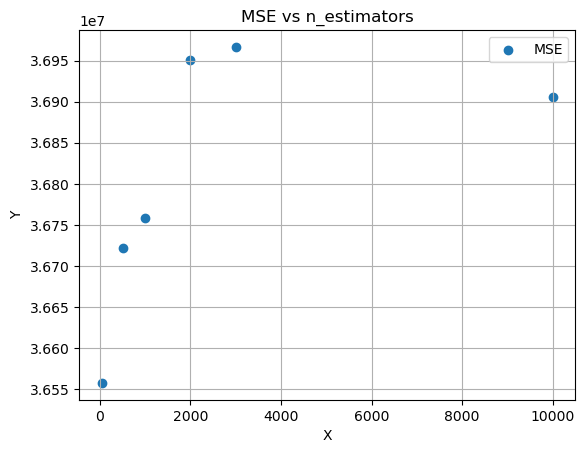

In [64]:
# Fit a line to the data (simple linear regression)

x = result['n_estimators']
y = result['MSE']

coefficients = np.polyfit(x, y, 1)


# Scatter plot
plt.scatter(x, y, label='MSE')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('MSE vs n_estimators')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

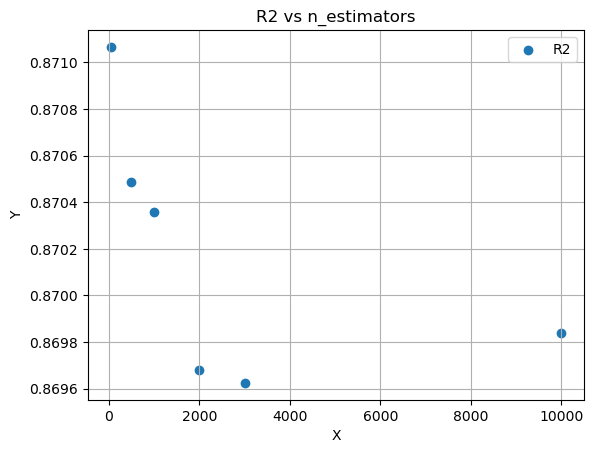

In [65]:
# Fit a line to the data (simple linear regression)

x = result['n_estimators']
y = result['R2']

coefficients = np.polyfit(x, y, 1)


# Scatter plot
plt.scatter(x, y, label='R2')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('R2 vs n_estimators')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

MSE and r2 are optimized at 40, so we chose 40 as n estimator value

# Conclusion

In [67]:
print('#Final Results')

reg_moduel=RandomForestRegressor(n_estimators=40,random_state=37)
reg_moduel.fit(X_train,y_train)
#Calculating Details
print('Random Forest Regressor Train Score is : ' ,  reg_moduel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , reg_moduel.score(X_test, y_test))
 
print('----------------------------------------------------')


 
y_pred = reg_moduel.predict(X_test)
 
# Calculate mean squared error (MSE)
mse_2000 = mean_squared_error(y_test, y_pred)


# Calculate R-squared score
r2_2000 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_2000)
print("R-squared Score:", r2_2000)

#Final Results
Random Forest Regressor Train Score is :  0.9788973318361505
Random Forest Regressor Test Score is :  0.8710664477573149
----------------------------------------------------
Mean Squared Error (MSE): 36557751.760807976
R-squared Score: 0.8710664477573149
